# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# Import our data into pandas from CSV
csvpath = os.path.join('..', 'Data', 'trip.csv')
bike_trips_df = pd.read_csv(csvpath)

bike_trips_df.head()

/Users/edude/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


What to do about the dtype warning

https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [5]:
bike_trips_df.dtypes

stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear             object
dtype: object

In [19]:
# Import our data into pandas from CSV
csvpath = os.path.join('..', 'Data', 'trip.csv')
dtype = {'stoptime': str,
         'bikeid': str,
         'tripduration': float,
         'from_station_name': str,
         'to_station_name': str,
         'from_station_id': str,
         'to_station_id': str,
         'usertype': str,
         'gender': str,
         'birthyear': object
        }
bike_trips_df = pd.read_csv(csvpath, dtype=dtype)

bike_trips_df.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [11]:
# Import our data into pandas from CSV
csvpath = os.path.join('..', 'Data', 'trip.csv')
bike_trips_df = pd.read_csv(csvpath, low_memory=False)

bike_trips_df.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [12]:
# Split up our data into groups based upon 'gender'
gender_groups = bike_trips_df.groupby('gender')
gender_groups

In [13]:
# Find out how many of each gender took bike trips
gender_trips = gender_groups['tripduration'].count()
print(gender_trips.head())

gender
Female       37562
Male        140564
Other         3431
stoptime         1
Name: tripduration, dtype: int64


In [20]:
gender_trips.index

Index(['Female', 'Male', 'Other'], dtype='object', name='gender')

In [18]:
type(gender_trips)

pandas.core.series.Series

In [15]:
# Drop the 'stoptime' row that is contained within our group
gender_trips = gender_trips.drop('stoptime')
print(gender_trips.head())

gender
Female     37562
Male      140564
Other       3431
Name: tripduration, dtype: int64


gender
Female       37562
Male        140564
Other         3431
stoptime         1
Name: tripduration, dtype: int64
gender
Female     37562
Male      140564
Other       3431
Name: tripduration, dtype: int64


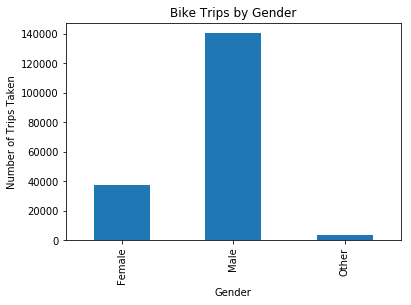

In [3]:
# Chart our data, give it a title, and label the axes
gender_chart = gender_trips.plot(kind="bar")
gender_chart.set_title("Bike Trips by Gender")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of Trips Taken")

plt.show()

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for a given bike (for example, 'SEA00001'). For this part of the activity, we want you to chart the total 'Trip Duration' of the given bike by gender.

In [16]:
# Split up our data into groups based upon 'bikeid' and 'gender'
bike_groups = bike_trips_df.groupby(['bikeid','gender'])

# Create a new variable that holds the sum of our groups
sum_it_up = bike_groups.sum()
sum_it_up.head()

tripduration
bikeid   gender              
SEA00001 Female     15876.665
         Male       41150.373
         Other        276.880
SEA00005 Female     20616.240
         Male       60386.328

<class 'pandas.core.series.Series'>


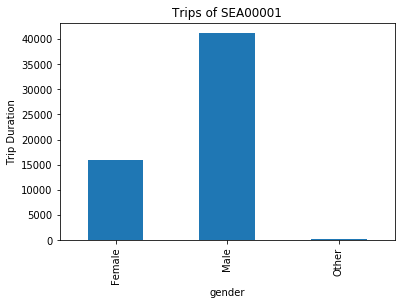

In [17]:
# Make a variable called bike_id and store a 'bikeid' in it
bike_id = "SEA00001"

# Collect the trips of the 'bikeid' above
just_one_bike = sum_it_up.loc[bike_id, 'tripduration']
print(type(just_one_bike))

# Create a pie chart based upon the trip duration of that
# single bike
bike_pie = just_one_bike.plot(kind="bar")
plt.title('Trips of ' + bike_id)
plt.ylabel("Trip Duration")

plt.show()

<class 'pandas.core.frame.DataFrame'>


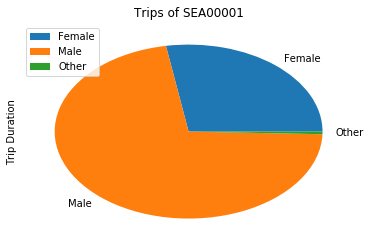

In [6]:
# Collect the trips of the 'bikeid' above
just_one_bike = sum_it_up.loc[bike_id]
print(type(just_one_bike))

genders = just_one_bike.keys()

# Create a pie chart based upon the trip duration of that
# single bike
bike_pie = just_one_bike.plot(kind="pie", y=genders)
plt.title('Trips of ' + bike_id)
plt.ylabel("Trip Duration")

plt.show()